## Observations and Insights 

In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
merge_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [88]:
# Checking the number of mice.
mouse_count=merge_data['Mouse ID'].count()
mouse_count

1893

In [89]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merge_data[merge_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [90]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_rows = merge_data[merge_data.duplicated(['Mouse ID',])]
all_duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [91]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_data.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [92]:
# Checking the number of mice in the clean DataFrame.
mouse_count=merge_data['Mouse ID'].count()
mouse_count

1893

## Summary Statistics

In [111]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = merge_data.mean()
median = merge_data.median()
variance = merge_data.var()
standard_dv = merge_data.std()
sem = merge_data.sem()
# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df.loc['Tumor Volume (mm3)']

Mean                  50.448381
Median                48.951474
Variance              79.116074
Standard Deviation     8.894722
SEM                    0.204436
Name: Tumor Volume (mm3), dtype: float64

In [94]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
groupby_mean = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
groupby_median = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
groupby_variance = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
groupby_standard_dv = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
groupby_sem = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# This method produces everything in a single groupby function
groupby_summary_df = pd.DataFrame({"Mean": groupby_mean, "Median": groupby_median, "Variance": groupby_variance, "Standard Deviation": groupby_standard_dv, "SEM": groupby_sem})
groupby_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

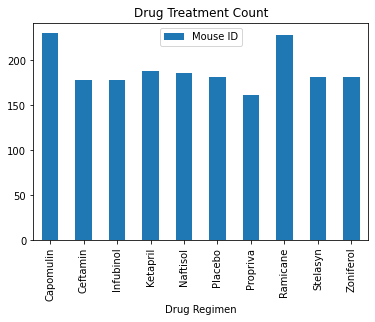

In [95]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_data = pd.DataFrame(merge_data.groupby(["Drug Regimen"]).count()).reset_index()

drugs_df = drug_data[["Drug Regimen", "Mouse ID"]]
drugs_df = drugs_df.set_index("Drug Regimen")

drugs_df.plot(kind="bar")

plt.title("Drug Treatment Count")
plt.show()

<BarContainer object of 10 artists>

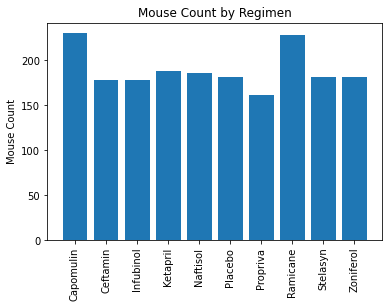

In [96]:
# Generate a bar plot showing number of mice for each treatment throughout the course of the study using pyplot.
plot_data_mat = drugs_df.reset_index()

drug = plot_data_mat['Drug Regimen']
mice = plot_data_mat['Mouse ID']
plt.xticks(rotation='vertical')
plt.title("Mouse Count by Regimen")
plt.ylabel("Mouse Count")
plt.bar(drug, mice)

<AxesSubplot:ylabel='Sex'>

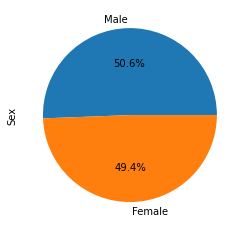

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex = merge_data['Sex'].value_counts()
mouse_sex.plot(kind="pie", autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x176ab693fd0>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

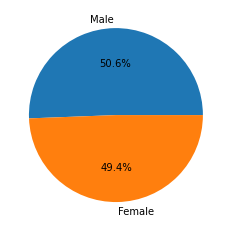

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_sex, autopct="%1.1f%%", labels=('Male', 'Female'))

## Quartiles, Outliers and Boxplots

In [99]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ('Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin')
drug_eval = merge_data.loc[merge_data['Drug Regimen'].isin(drug_list)]

# Start by getting the last (greatest) timepoint for each mouse
tumor_volume_df = drug_eval.groupby(drug_eval['Mouse ID']).agg({'Timepoint':['max']})
tumor_volume_df.columns = ['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_df = tumor_volume_df.reset_index()
tumor_vol_final_df = pd.merge(tumor_volume_df, merge_data, how="left", on=["Mouse ID", "Timepoint"])
tumor_vol_final_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [100]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:
    tumor_vol_by_drug = tumor_vol_final_df['Tumor Volume (mm3)'].loc[tumor_vol_final_df['Drug Regimen'] == drug]
    
    # add subset 
    tumor_volumes.append(tumor_vol_by_drug)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_by_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'For {drug}, IQR is {iqr}')
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'For {drug} below {lower_bound} could be outliers.')
    print(f'For {drug} above {upper_bound} could be outliers.')

For Capomulin, IQR is 7.781863460000004
For Capomulin below 20.70456164999999 could be outliers.
For Capomulin above 51.83201549 could be outliers.
For Ramicane, IQR is 9.098536719999998
For Ramicane below 17.912664470000003 could be outliers.
For Ramicane above 54.30681135 could be outliers.
For Infubinol, IQR is 11.477135160000003
For Infubinol below 36.83290494999999 could be outliers.
For Infubinol above 82.74144559000001 could be outliers.
For Ceftamin, IQR is 15.577752179999997
For Ceftamin below 25.355449580000002 could be outliers.
For Ceftamin above 87.66645829999999 could be outliers.


C:\Users\dmar0\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


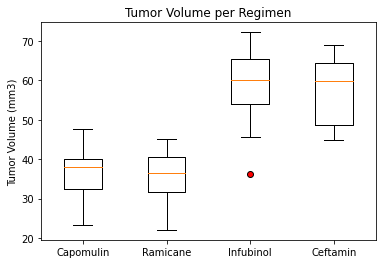

In [101]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot = dict(markerfacecolor='r', marker='o')

fig, ax = plt.subplots()
ax.set_title('Tumor Volume per Regimen')
ax.set_xticklabels(drug_list)
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(tumor_volumes, flierprops=box_plot)
plt.show()

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint')

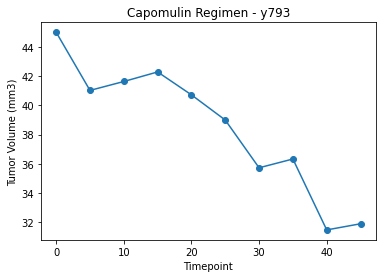

In [102]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
find_mouse = merge_data[['Timepoint', 'Tumor Volume (mm3)']].loc[(merge_data['Drug Regimen'] == 'Capomulin') & (merge_data['Mouse ID']=='y793')]
find_mouse

plt.plot(find_mouse['Timepoint'], find_mouse['Tumor Volume (mm3)'], marker='o')
plt.title("Capomulin Regimen - y793")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")

(35.0, 46.0)

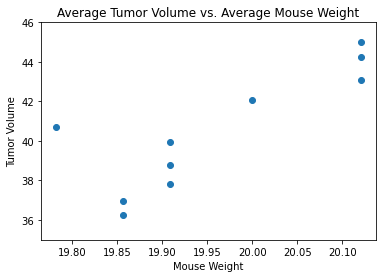

In [103]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_avg_tumor_wgt = merge_data.loc[merge_data['Drug Regimen'] == 'Capomulin'].groupby(merge_data['Timepoint']).agg({'Tumor Volume (mm3)':['mean'], 'Weight (g)':['mean']})
cap_avg_tumor_wgt.columns = ['Average Tumor Volume', 'Average Mouse Weight']

atv = cap_avg_tumor_wgt['Average Tumor Volume']
amw = cap_avg_tumor_wgt['Average Mouse Weight']
plt.scatter(amw,atv)
plt.title('Average Tumor Volume vs. Average Mouse Weight')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.ylim(35,46)

## Correlation and Regression

The correlation between average tumor volume and mouse weight is 0.8207292487213749
Linear regression equation is y = 20.29x + -364.52


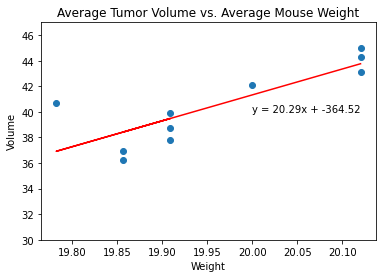

In [104]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(atv,amw)
print(f'The correlation between average tumor volume and mouse weight is {correlation[0]}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(amw,atv)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'Linear regression equation is {line_eq}')

atv = cap_avg_tumor_wgt['Average Tumor Volume']
amw = cap_avg_tumor_wgt['Average Mouse Weight']
plt.scatter(amw,atv)
plt.title('Average Tumor Volume vs. Average Mouse Weight')
plt.xlabel('Weight')
plt.ylabel('Volume')
plt.ylim(30,47)

reg_values = amw * slope + intercept
plt.plot(amw, reg_values, "r-")
plt.annotate(line_eq,(20,40))
plt.show()